# Лабораторная работа 10
---

### Упражнение 10.1
> В методический материалах в разделе «Акустическая характеристика» при умножении ДПФ сигнала на передаточную функцию в начале результирующего фрагмента слышна лишняя нота. Этот эффект «заворота» появляется в связи с тем, что данная операция соответствует круговой свертке. Его можно избежать, добавив в конец сигнала перед DPF несколько нулей

Для проверки сначала откроем запись выстрела

In [1]:
from thinkdsp import *
import numpy as np

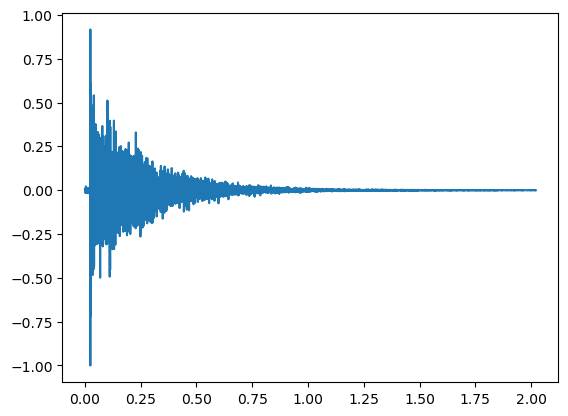

In [2]:
response = read_wave('180960__kleeb__gunshot.wav')
start = 0.12
response = response.segment(start=start)
response.shift(-start)
response.normalize()
response.plot()

Также откроем запись скрипки

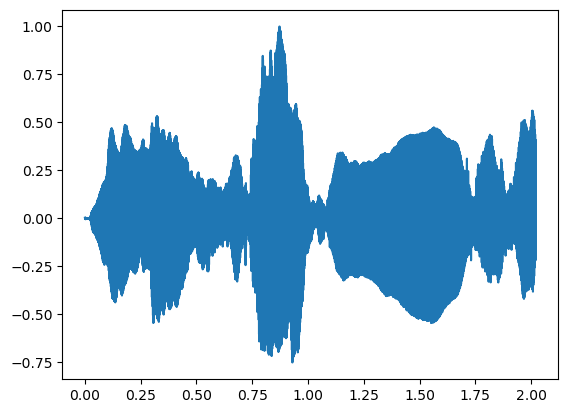

In [3]:
violin = read_wave('92002__jcveliz__violin-origional.wav')
start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)
violin.truncate(len(response))
violin.normalize()
violin.plot()

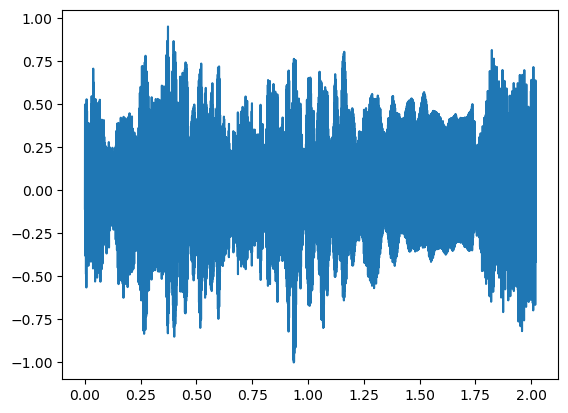

In [4]:
transfer = response.make_spectrum()
spectrum = violin.make_spectrum()
output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()
output.make_audio()

В начале записи мы можем услышать как будто лишнюю ноту, избавимся от эффекта заворота, добавив в конец сигнала нули

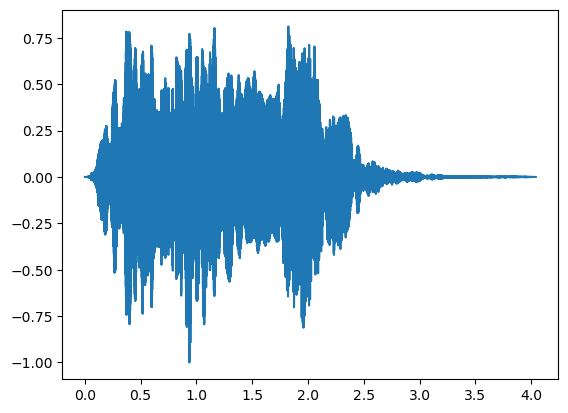

In [5]:
response.zero_pad(len(response) * 2)
violin.zero_pad(len(violin) * 2)
transfer = response.make_spectrum()
spectrum = violin.make_spectrum()
output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()
output.make_audio()

Как мы можем заметить, на новом графике отсутствует всплеск в начале, который был на предыдущем графике. Это также можно услышать, прослушав запись

### Упражнение 10.2
> Смоделируйте двумя способами звучание записи в том пространстве, где была измерена импульсная характеристика, как сверткой записи с импульсной характеристикой, так и умножением ДПФ записи на вычисленный фильтр, соответствующей импульсной характеристике

В качестве помещения, где была замеряна импульсная характеристика, был выбран зал ядерного реактора 

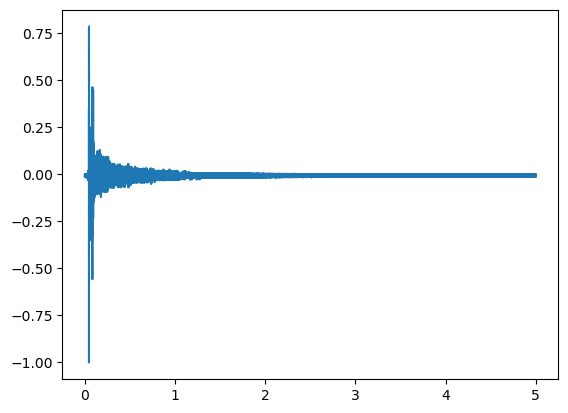

In [37]:
impulse_response = read_wave('r1_ortf.wav').segment(0, 5)
impulse_response.plot()
impulse_response.make_audio()

Также вывежем спектр импульсной характеристики

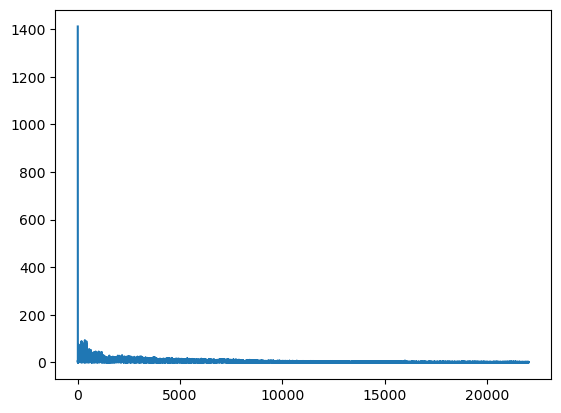

In [38]:
impulse_spec = impulse_response.make_spectrum()
impulse_spec.plot()

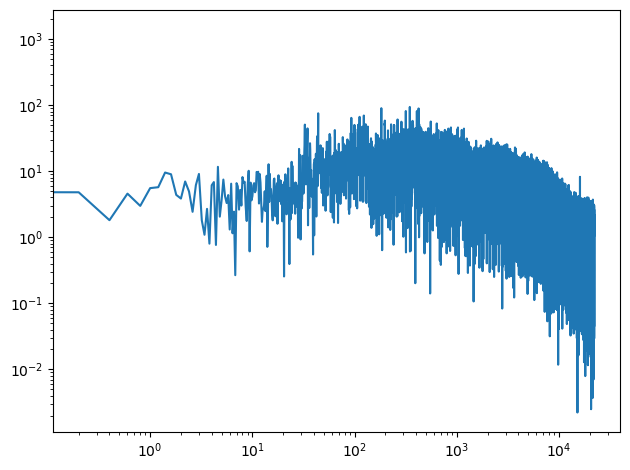

In [39]:
impulse_spec.plot()
decorate(xscale='log', yscale='log')

Теперь смоделируем как наша запись будет звучать, если бы она была хаписана в том же помещении. Использовать будем следующий гитарный рифф

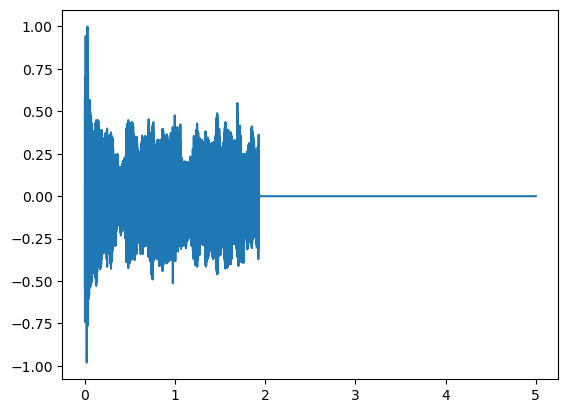

In [45]:
riff = read_wave('buddy_holly_riff.wav')
# Дополнение нулями, чтобы длина совпадала
riff.zero_pad(len(impulse_response))

riff.plot()
riff.make_audio()

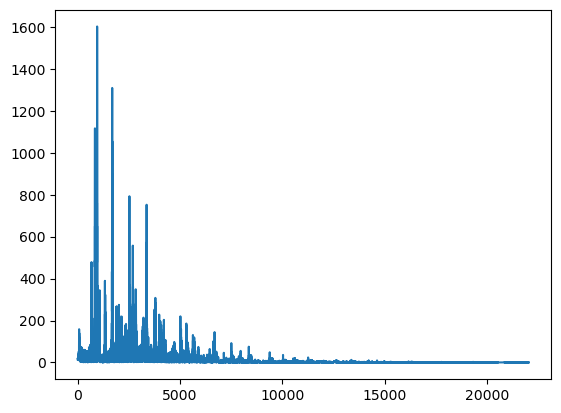

In [48]:
spectrum = riff.make_spectrum()
spectrum.plot()


Преобразуем запись умножив ДПФ на фильтр

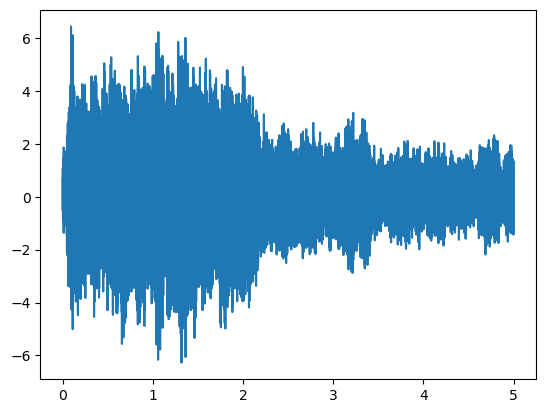

In [51]:
result1 = (spectrum * impulse_spec).make_wave()
result1.plot()
result1.make_audio()

В результате мы можем услышать очень сильное эхо какое и ожиается внутри ядерного реактора

Повторим результат, но в этот раз используя свертку

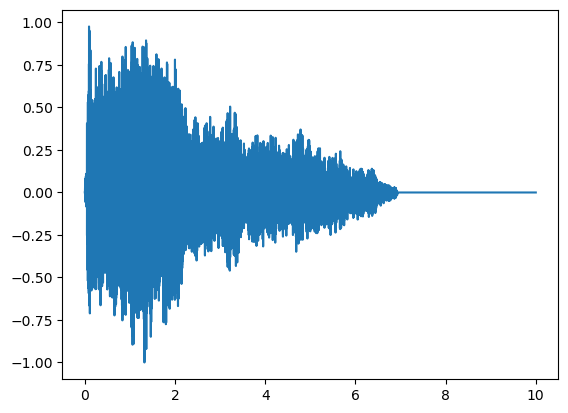

In [52]:
result2 = riff.convolve(impulse_response)
result2.normalize()
result2.plot()
result2.make_audio()